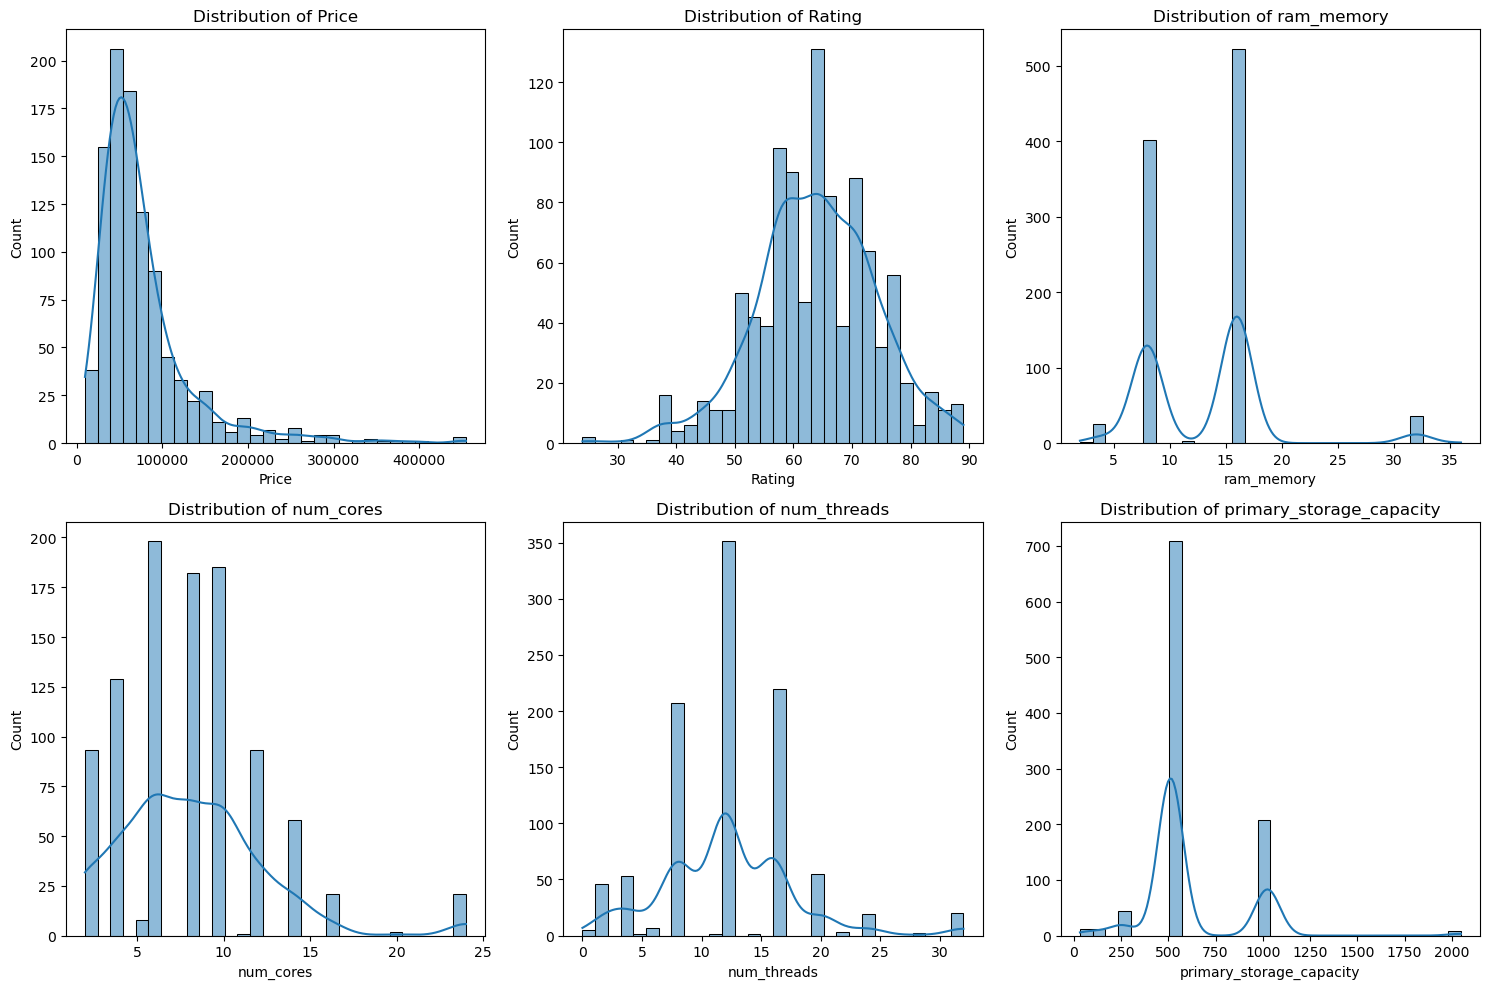

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

file_path = "laptops.csv"
df = pd.read_csv(file_path)

# Step 3: Basic visualization of numeric distributions
numeric_cols = ['Price', 'Rating', 'ram_memory', 'num_cores', 'num_threads', 'primary_storage_capacity']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

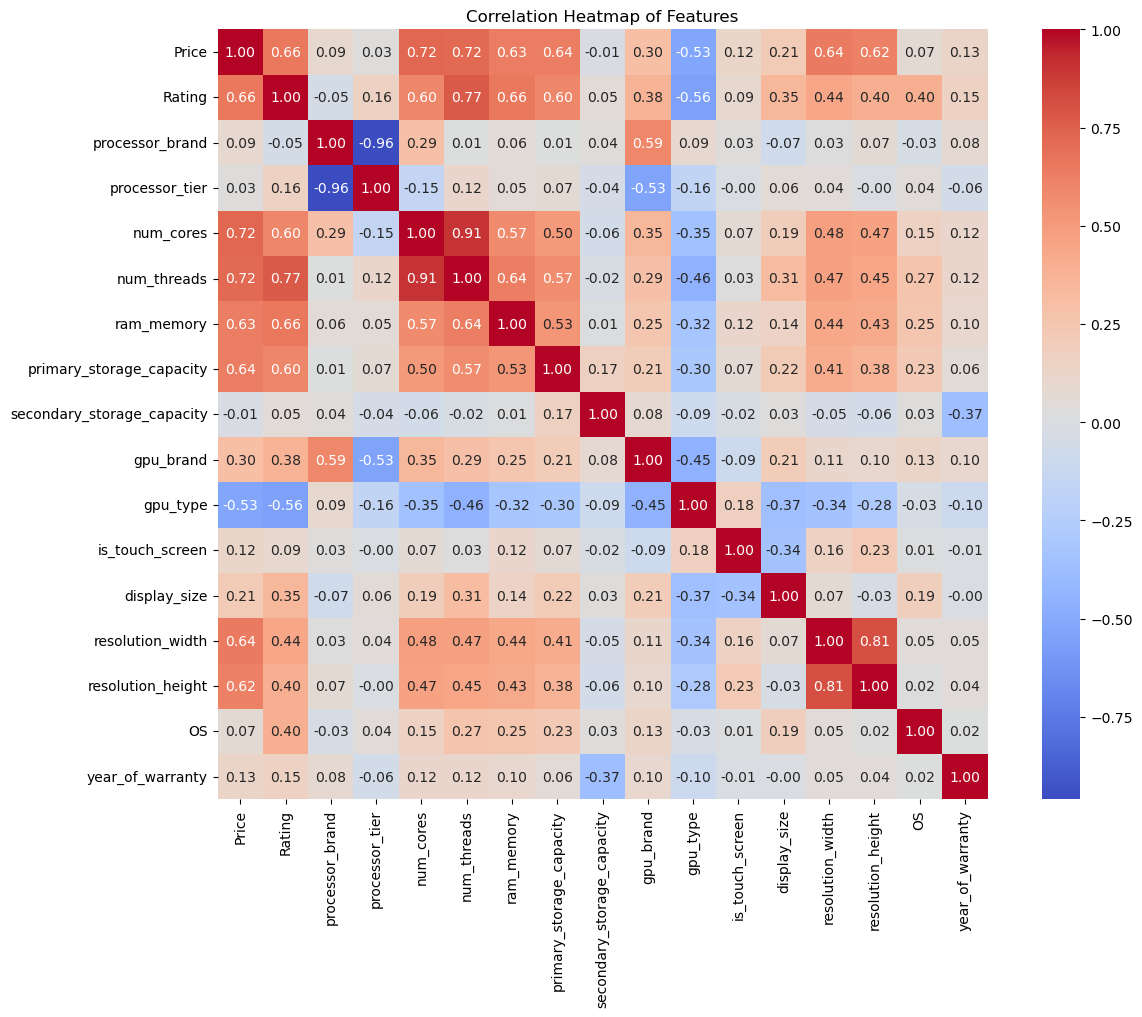

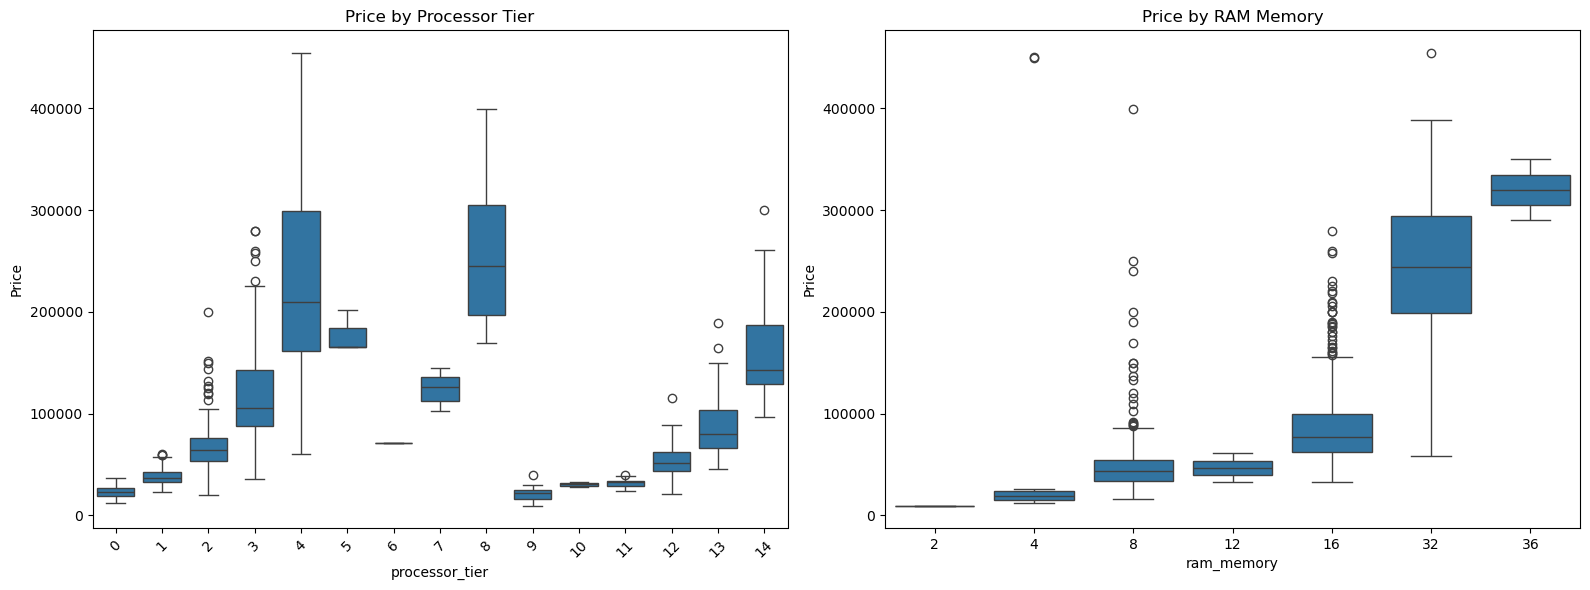

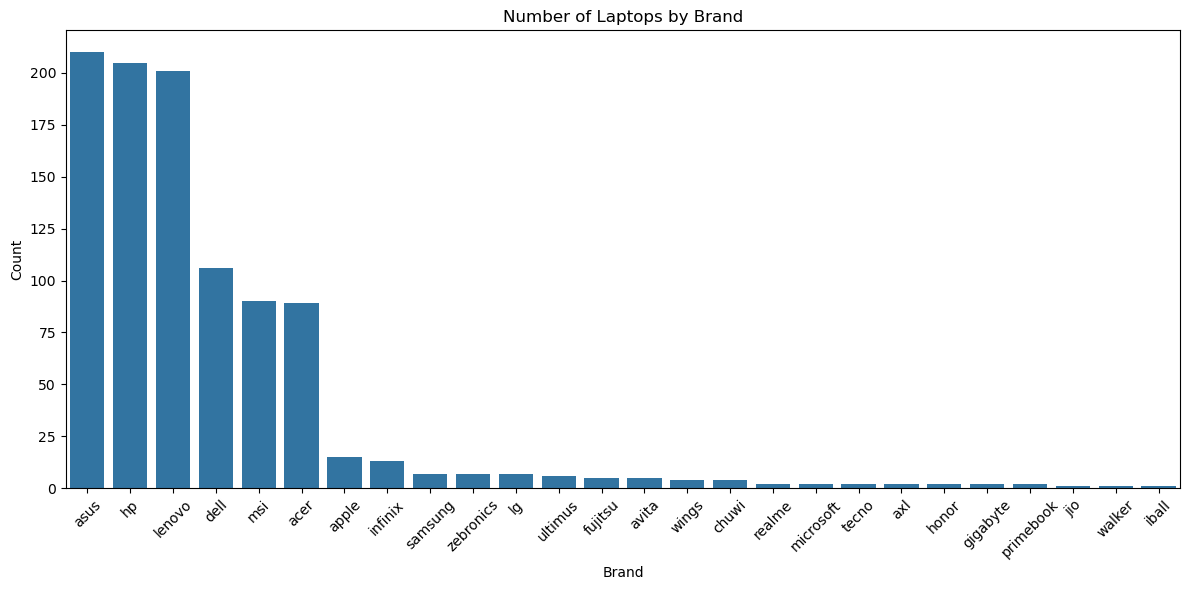

In [12]:
# 1. Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_cleaned[features].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

# 2. Boxplots for Price grouped by processor_tier and ram_memory
plt.figure(figsize=(16, 6))

# Boxplot by Processor Tier
plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned, x='processor_tier', y='Price')
plt.title("Price by Processor Tier")
plt.xticks(rotation=45)

# Boxplot by RAM
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned, x='ram_memory', y='Price')
plt.title("Price by RAM Memory")

plt.tight_layout()
plt.show()

# 3. Count Plot of Brands
plt.figure(figsize=(12, 6))
brand_labels = label_encoders['brand'].inverse_transform(df_cleaned['brand'])
sns.countplot(x=brand_labels, order=pd.Series(brand_labels).value_counts().index)
plt.title("Number of Laptops by Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Step 4: Data Cleaning
df_cleaned = df.drop(columns=['index', 'Model']).dropna()
df_cleaned['year_of_warranty'] = df_cleaned['year_of_warranty'].replace('No information', 0).astype(int)

# Step 5: Encoding Categorical Columns
categorical_cols = ['brand', 'processor_brand', 'processor_tier', 'gpu_brand', 'gpu_type',
                    'is_touch_screen', 'primary_storage_type', 'secondary_storage_type', 'OS']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Step 6: Feature Selection
features = ['Price', 'Rating', 'processor_brand', 'processor_tier', 'num_cores',
            'num_threads', 'ram_memory', 'primary_storage_capacity',
            'secondary_storage_capacity', 'gpu_brand', 'gpu_type',
            'is_touch_screen', 'display_size', 'resolution_width',
            'resolution_height', 'OS', 'year_of_warranty']
X = df_cleaned[features]

# Step 7: Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DataFrame ready for clustering
df_cleaned.head()

,brand,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,21,23990,63,2,1,2,4,8,1,512,0,0,3,2,0,15.6,1920,1080,6,1
1,21,35990,67,2,3,4,8,16,1,1024,0,0,3,2,0,15.6,1920,1080,6,1
2,10,51100,73,0,12,6,12,8,1,512,0,0,0,1,0,15.6,1920,1080,6,1
3,0,39990,62,2,2,12,16,8,1,512,0,0,3,2,0,14.0,1920,1080,6,1
4,14,28580,62,0,11,4,8,8,1,512,0,0,0,2,0,15.6,1920,1080,6,1


C:\Users\Serina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Serina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Serina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Serina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

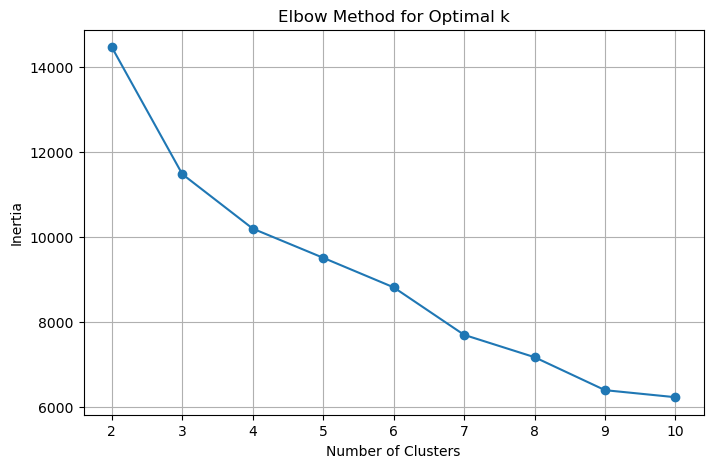

C:\Users\Serina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


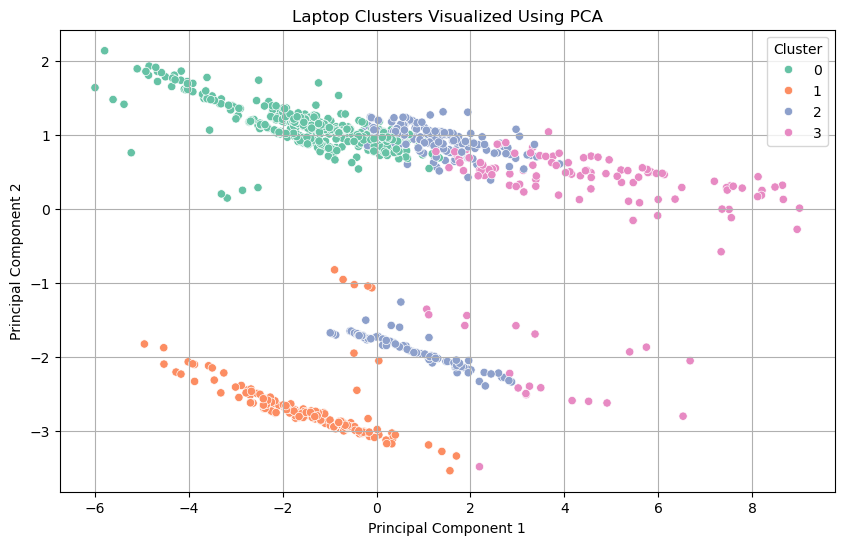

                 Price     Rating  ram_memory  num_cores  num_threads  \
Cluster                                                                 
0         51711.456731  57.266827   10.899038   6.918269     9.055288   
1         49991.511628  60.156977   11.139535   5.465116    10.604651   
2         84145.172662  70.784173   14.388489   8.726619    14.316547   
3        184545.936000  76.064000   19.840000  14.488000    20.088000   

         primary_storage_capacity  
Cluster                            
0                      513.846154  
1                      540.279070  
2                      645.525180  
3                      954.368000  


In [20]:

inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# 2. Apply KMeans with optimal k (based on elbow, assume k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(X_scaled)

# 3. Dimensionality reduction for cluster visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cleaned['PCA1'] = X_pca[:, 0]
df_cleaned['PCA2'] = X_pca[:, 1]

# Cluster visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Laptop Clusters Visualized Using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Step 9: Storytelling - Cluster insights
# Grouped summary statistics
cluster_summary = df_cleaned.groupby('Cluster')[['Price', 'Rating', 'ram_memory', 'num_cores', 'num_threads', 'primary_storage_capacity']].mean()

print(cluster_summary)